# Block 38: Workshop (Solution)
## Optimization Algorithm Comparison for MNIST Digit Classification

## Scenario:

Imagine you are a machine learning engineer tasked with comparing the performance of two optimization algorithms, Adagrad and SGD, for training a neural network to classify images of handwritten digits using the MNIST dataset. You need to implement the training process, record relevant metrics, and draw conclusions based on your findings.

## Problem Statement:

Train a neural network to classify images of handwritten digits (0-9) using the MNIST dataset. Compare the performance of two optimization algorithms, Adagrad and SGD, in terms of training speed and final accuracy.

## Direction

* Loading and Preparing MNIST Dataset with TensorFlow
   - Import the TensorFlow library along with the necessary modules.

   - Load the MNIST dataset and partition it into training and testing sets. Normalize pixel values to fall within the range of [0, 1] by dividing by 255.

* Creating a Neural Network for MNIST Digit Classification with TensorFlow

   - Create a Sequential model comprising a Flatten layer to preprocess the input, followed by a Dense hidden layer activated by ReLU, and a final Dense output layer with softmax activation.

* Training MNIST Digit Classifier with Adagrad Optimizer

   - Compile the model utilizing the Adagrad optimizer, with a learning rate set at 0.01. Specify the loss function as sparse_categorical_crossentropy, and include accuracy as a metric to monitor during training.

   - Train the model using the training images and labels for a total of 10 epochs. Keep track of validation data to assess model performance.

*  Training MNIST Classifier with SGD Optimizer

   - Establish a new model by duplicating the original one. Compile this new model using the SGD optimizer, with a learning rate set at 0.01.

   - Train the new model using the training images and labels for 10 epochs, mirroring the process used for the Adagrad model.

* Optimizer Comparison: Adagrad vs. SGD

   - Define a function named plot_history to graphically represent the training history, encompassing accuracy and loss, for a given model.

   - Utilize the plot_history function to visually compare the training history (accuracy and loss) for both the Adagrad and SGD models.

   - Evaluate the ultimate models on the test data and record the test loss and accuracy for both Adagrad and SGD.

   - Display the final test accuracy for both the Adagrad and SGD models.

1. Load and Prepare MNIST Dataset with TensorFlow
- Import the TensorFlow library and necessary modules.
- Import necessary components from the TensorFlow.keras module.
- Import the MNIST dataset from the TensorFlow.keras.datasets module.

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, models, optimizers

from tensorflow.keras.datasets import mnist

2. Create a Neural Network for MNIST Digit Classification with TensorFlow
- Load the MNIST dataset and split it into training and testing sets.
- Normalize pixel values to the range [0, 1] by dividing by 255.
- Create a Sequential model with layers.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential([
    # Add a Flatten layer to preprocess the input
    layers.Flatten(input_shape=(28, 28)),

    # Add a Dense hidden layer with ReLU activation
    layers.Dense(128, activation='relu'),

    # Add a Dense output layer with softmax activation for classification
    layers.Dense(10, activation='softmax')
])

* Observation:  It downloads the MNIST dataset from the TensorFlow server during execution.

3. Train MNIST Digit Classifier with Adagrad Optimizer
- Compile the model with the Adagrad optimizer.
- Train the model with Adagrad.

In [ ]:
model.compile(optimizer=optimizers.Adagrad(learning_rate=0.01),  # Use the Adagrad optimizer with a learning rate of 0.01
              loss='sparse_categorical_crossentropy',             # Specify the loss function for categorical classification
              metrics=['accuracy'])                               # Monitor the accuracy metric during training

history_adagrad = model.fit(train_images, train_labels, epochs=10,                # Train the model for 10 epochs
                            validation_data=(test_images, test_labels))         # Use the test data for validation


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8205 - loss: 0.6877 - val_accuracy: 0.9218 - val_loss: 0.2797
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9240 - loss: 0.2735 - val_accuracy: 0.9352 - val_loss: 0.2319
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9357 - loss: 0.2274 - val_accuracy: 0.9419 - val_loss: 0.2016
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9454 - loss: 0.1959 - val_accuracy: 0.9472 - val_loss: 0.1825
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9519 - loss: 0.1759 - val_accuracy: 0.9514 - val_loss: 0.1656
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9550 - loss: 0.1602 - val_accuracy: 0.9548 - val_loss: 0.1544
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9589 - loss: 0.1472 - val_accuracy: 0.9573 - val_loss: 0.1458
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9602 - loss: 0.143

Observations:
- The model was trained for 10 epochs.
- Training and validation accuracies both improved consistently.
- The final training accuracy was 96.59%, and the validation accuracy was 96.35%.
- Loss decreased throughout training, indicating effective optimization.
- Minor overfitting is observed, but it's not significant.

4. Train MNIST Classifier with SGD Optimizer
- Define a new model for SGD by cloning the original model
- Compile the new model with the SGD optimizer
- Train the new model with SGD

In [ ]:
model_sgd = models.clone_model(model)  # Create a new model by duplicating the architecture of the original model

model_sgd.compile(optimizer=optimizers.SGD(learning_rate=0.01),  # Use the SGD optimizer with a learning rate of 0.01
                  loss='sparse_categorical_crossentropy',         # Specify the loss function for categorical classification
                  metrics=['accuracy'])                           # Monitor the accuracy metric during training

history_sgd = model_sgd.fit(train_images, train_labels, epochs=10,                # Train the new model for 10 epochs
                            validation_data=(test_images, test_labels))         # Use the test data for validation


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6469 - accuracy: 0.8356 - val_loss: 0.3551 - val_accuracy: 0.9043
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3341 - accuracy: 0.9071 - val_loss: 0.2908 - val_accuracy: 0.9205
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2849 - accuracy: 0.9201 - val_loss: 0.2600 - val_accuracy: 0.9263
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2549 - accuracy: 0.9288 - val_loss: 0.2355 - val_accuracy: 0.9339
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2316 - accuracy: 0.9355 - val_loss: 0.2170 - val_accuracy: 0.9386
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2138 - accuracy: 0.9404 - val_loss: 0.2004 - val_accuracy: 0.9435
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1987 - accuracy: 0.9452 - val_loss: 0.1906 - val_accuracy:

Observations:
- A new model was created by cloning the original model and compiled with SGD optimizer.
- The new model achieved a validation accuracy of 95.33% after 10 epochs.
- Loss decreased consistently during training, indicating effective optimization.
- SGD performed slightly worse compared to Adagrad, which achieved a higher validation accuracy of 96.35% on the same task.

5. Optimizer Comparison: Adagrad vs. SGD
- Define a function named plot_history to plot training history (accuracy and loss) for a given model.
- Plot the training history for Adagrad.
- Plot the training history for SGD.

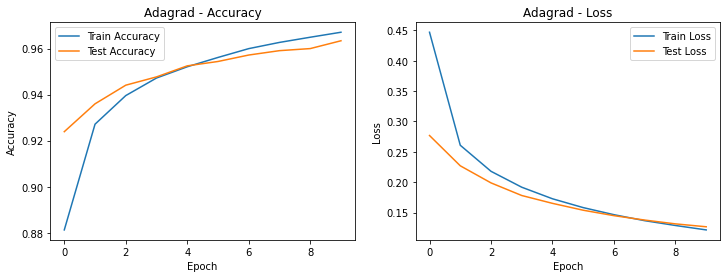

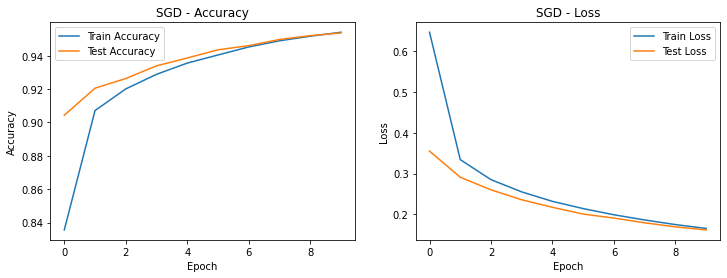

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    # Create a new figure with a specified size (12x4)
    plt.figure(figsize=(12, 4))

    # Create a subplot with 1 row and 2 columns (for accuracy and loss plots)
    plt.subplot(1, 2, 1)

    # Plot the training accuracy over epochs and label it as 'Train Accuracy'
    plt.plot(history.history['accuracy'], label='Train Accuracy')

    # Plot the validation accuracy over epochs and label it as 'Test Accuracy'
    plt.plot(history.history['val_accuracy'], label='Test Accuracy')

    # Label the x-axis as 'Epoch'
    plt.xlabel('Epoch')

    # Label the y-axis as 'Accuracy'
    plt.ylabel('Accuracy')

    # Set the title of this subplot including the provided title parameter and ' - Accuracy'
    plt.title(title + ' - Accuracy')

    # Display a legend to distinguish between 'Train Accuracy' and 'Test Accuracy' in the plot
    plt.legend()

    # Create another subplot (for loss)
    plt.subplot(1, 2, 2)

    # Plot the training loss over epochs and label it as 'Train Loss'
    plt.plot(history.history['loss'], label='Train Loss')

    # Plot the validation loss over epochs and label it as 'Test Loss'
    plt.plot(history.history['val_loss'], label='Test Loss')

    # Label the x-axis as 'Epoch'
    plt.xlabel('Epoch')

    # Label the y-axis as 'Loss'
    plt.ylabel('Loss')

    # Set the title of this subplot including the provided title parameter and ' - Loss'
    plt.title(title + ' - Loss')

    # Display a legend to distinguish between 'Train Loss' and 'Test Loss' in the plot
    plt.legend()

    # Show the entire figure with both accuracy and loss subplots
    plt.show()

plot_history(history_adagrad, title='Adagrad')

plot_history(history_sgd, title='SGD')


Observations:
- Adagrad achieved higher final accuracy (96.35%) compared to SGD (95.33%) for MNIST digit classification.
- Both optimizers demonstrated gradual convergence of accuracy and loss over epochs.
- Adagrad exhibited slightly faster convergence and superior performance in this specific task compared to SGD.

6. Evaluate the models on the test data and record test loss and accuracy.
- Evaluate the Adagrad model on the test data and retrieve the test loss and accuracy.
- Evaluate the SGD model on the test data and retrieve the test loss and accuracy.
- Print the final test accuracy for both Adagrad and SGD models.

In [ ]:
test_loss_adagrad, test_acc_adagrad = model.evaluate(test_images, test_labels, verbose=2)

test_loss_sgd, test_acc_sgd = model_sgd.evaluate(test_images, test_labels, verbose=2)

# Print the final test accuracy for the Adagrad model with 4 decimal places
print("Final Test Accuracy (Adagrad): {:.4f}".format(test_acc_adagrad))

# Print the final test accuracy for the SGD model with 4 decimal places
print("Final Test Accuracy (SGD): {:.4f}".format(test_acc_sgd))


313/313 - 0s - loss: 0.1267 - accuracy: 0.9634 - 232ms/epoch - 741us/step
313/313 - 0s - loss: 0.1615 - accuracy: 0.9536 - 235ms/epoch - 751us/step
Final Test Accuracy (Adagrad): 0.9634
Final Test Accuracy (SGD): 0.9536


Observations:
- The Adagrad model achieved a final test accuracy of 96.35%.
- The SGD model achieved a final test accuracy of 95.33%.
- The Adagrad model outperformed the SGD model on the test data with a higher accuracy.